In [1]:
import warnings
import matplotlib.pyplot as pl
import seaborn as sns
import pandas as pd
import numpy as np
# import missingo as msno

warnings.filterwarnings('ignore')
# pl.style.use('fivethirtyeight')
pl.style.use('seaborn-whitegrid')


In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')


In [3]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [5]:
train.shape,test.shape

((10886, 12), (6493, 9))

In [6]:
train.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [7]:
test.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
dtype: int64

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [9]:
train.describe().T


,count,mean,std,min,25%,50%,75%,max
season,10886.0,2.506614,1.116174,1.00,2.0000,3.000,4.0000,4.0000
holiday,10886.0,0.028569,0.166599,0.00,0.0000,0.000,0.0000,1.0000
workingday,10886.0,0.680875,0.466159,0.00,0.0000,1.000,1.0000,1.0000
weather,10886.0,1.418427,0.633839,1.00,1.0000,1.000,2.0000,4.0000
temp,10886.0,20.230860,7.791590,0.82,13.9400,20.500,26.2400,41.0000
atemp,10886.0,23.655084,8.474601,0.76,16.6650,24.240,31.0600,45.4550
humidity,10886.0,61.886460,19.245033,0.00,47.0000,62.000,77.0000,100.0000
windspeed,10886.0,12.799395,8.164537,0.00,7.0015,12.998,16.9979,56.9969
casual,10886.0,36.021955,49.960477,0.00,4.0000,17.000,49.0000,367.0000
registered,10886.0,155.552177,151.039033,0.00,36.0000,118.000,222.0000,886.0000


In [10]:
# # This library is used to check missing values
# msno.matrix(train)
# msno.bar(test)

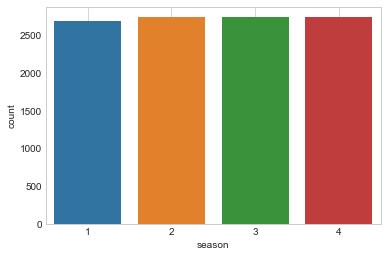

In [11]:
sns.countplot(train['season'])
pl.grid()

<AxesSubplot:xlabel='holiday', ylabel='count'>

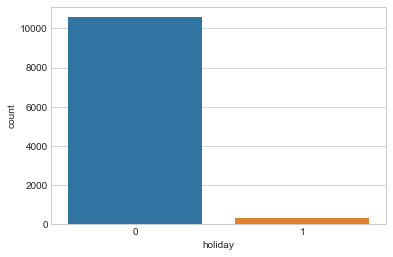

In [12]:
sns.countplot(train['holiday'])

<AxesSubplot:xlabel='season', ylabel='count'>

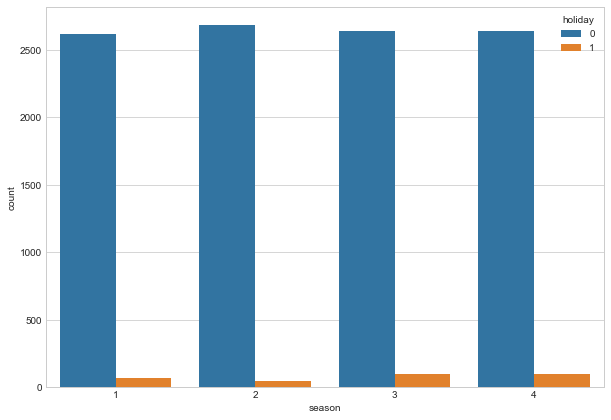

In [13]:
pl.figure(figsize=(10,7))
sns.countplot(train['season'],hue=train['holiday'])


<AxesSubplot:xlabel='holiday', ylabel='count'>

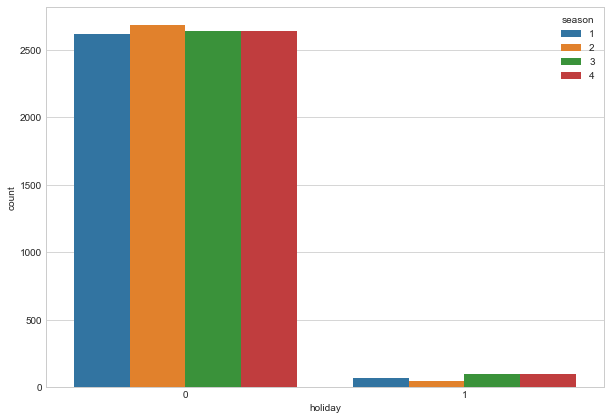

In [14]:
pl.figure(figsize=(10,7))
sns.countplot(train['holiday'],hue=train['season'])


In [15]:
temp_df=train.groupby(['season','weather'])['weather'].count()
temp_df

season  weather
1       1          1759
        2           715
        3           211
        4             1
2       1          1801
        2           708
        3           224
3       1          1930
        2           604
        3           199
4       1          1702
        2           807
        3           225
Name: weather, dtype: int64

<AxesSubplot:xlabel='season,weather'>

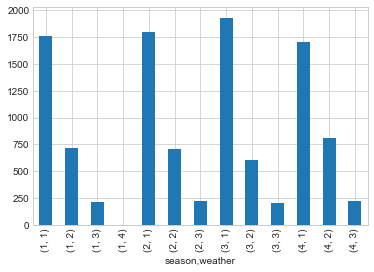

In [16]:
temp_df.plot(kind='bar')

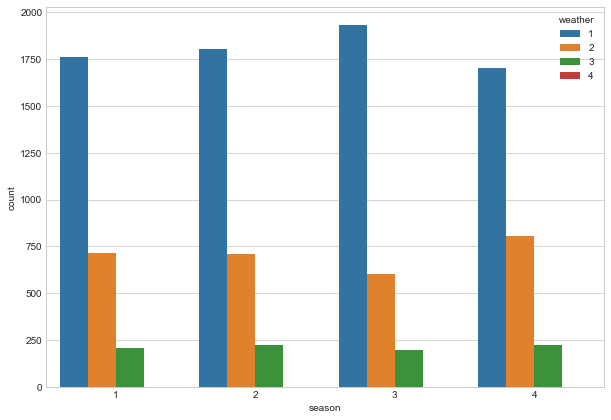

In [17]:
pl.figure(figsize=(10,7))
sns.countplot(train['season'],hue=train['weather'])
pl.show()

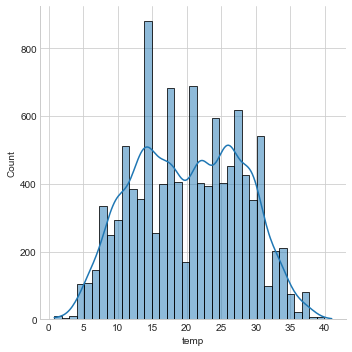

In [18]:
sns.displot(train['temp'],kde=True)

<AxesSubplot:xlabel='weather', ylabel='count'>

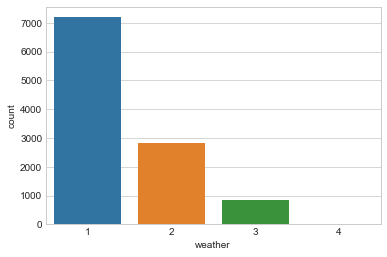

In [19]:
sns.countplot(train['weather'])

<AxesSubplot:xlabel='weather', ylabel='count'>

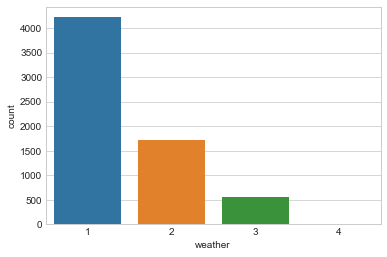

In [20]:
sns.countplot(test['weather'])

<AxesSubplot:xlabel='humidity', ylabel='Density'>

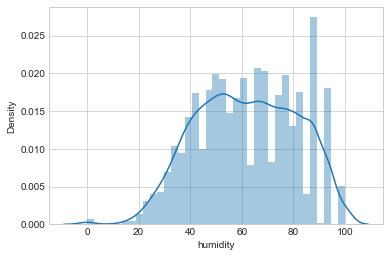

In [21]:
sns.distplot(train['humidity'])

In [22]:
temp=np.log(train['humidity'])


In [23]:
index=np.where(temp==float('-inf'))[0]
temp[index]=0

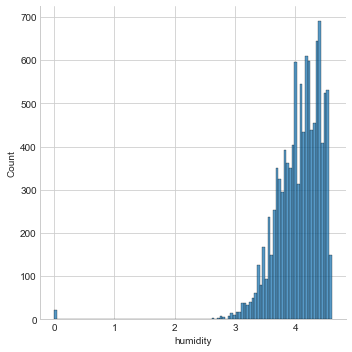

In [24]:
sns.displot(temp)

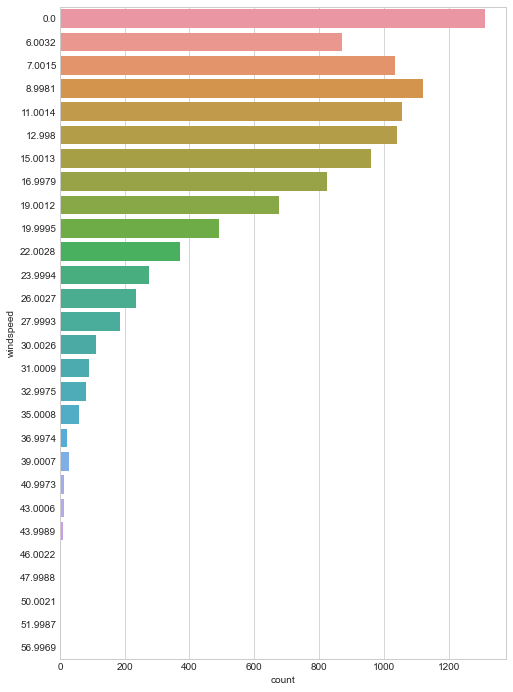

In [25]:
pl.figure(figsize=(8,12))
sns.countplot(y=train['windspeed'])
pl.yticks(rotation=0)
pl.show()

<AxesSubplot:xlabel='windspeed', ylabel='Density'>

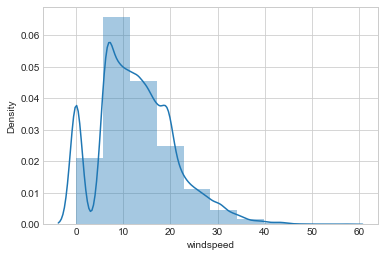

In [26]:
sns.distplot(train['windspeed'],bins=10,
            )

In [27]:
temp=np.log(train['windspeed'])
temp

0            -inf
1            -inf
2            -inf
3            -inf
4            -inf
           ...   
10881    3.258200
10882    2.708137
10883    2.708137
10884    1.792293
10885    2.197013
Name: windspeed, Length: 10886, dtype: float64

In [28]:
index=np.where(temp==float('-inf'))[0]

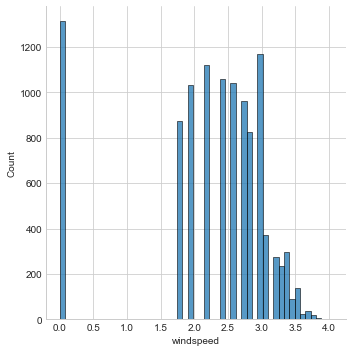

In [29]:
temp[index]=0
sns.displot(temp)

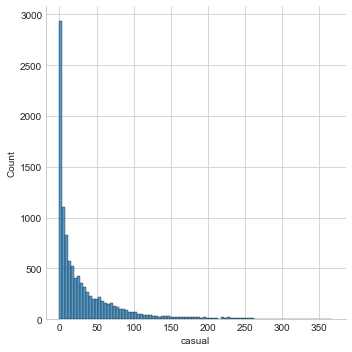

In [30]:
sns.displot(train['casual'])

In [31]:
temp=np.log(train['casual'])
print(temp)
index=np.where(temp==float('-inf'))[0]
temp[index]=0

0        1.098612
1        2.079442
2        1.609438
3        1.098612
4            -inf
           ...   
10881    1.945910
10882    2.302585
10883    1.386294
10884    2.484907
10885    1.386294
Name: casual, Length: 10886, dtype: float64


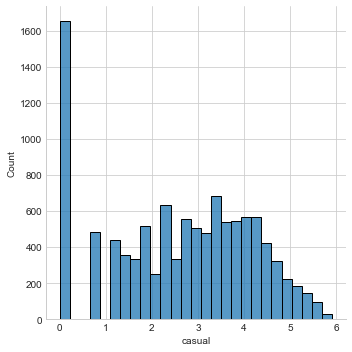

In [32]:
sns.displot(temp)

<AxesSubplot:xlabel='count', ylabel='Density'>

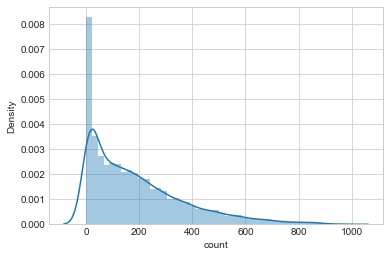

In [33]:
sns.distplot(train['count'])

In [34]:
temp=np.log(train['count'])
index=np.where(temp==float('-inf'))[0]
temp[index]=0

<AxesSubplot:xlabel='count', ylabel='Density'>

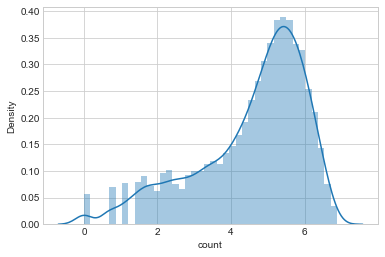

In [35]:
sns.distplot(temp)

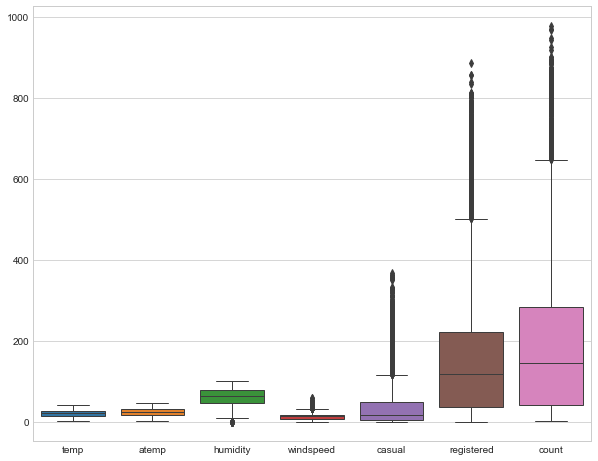

In [36]:
pl.figure(figsize=(10,8))
sns.boxplot(data=train[['temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']],
           linewidth=1)
pl.show()

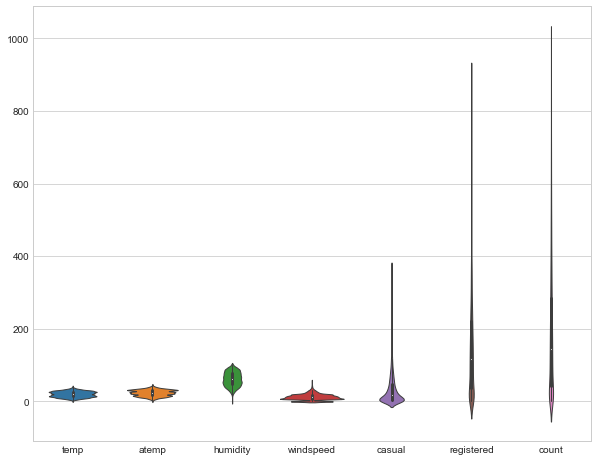

In [37]:
pl.figure(figsize=(10,8))
sns.violinplot(data=train[['temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']],
              linewidth=1)
pl.show()

In [38]:
corr_mat=train.corr()
corr_mat

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948


In [39]:
mask=np.array(corr_mat)
mask

array([[ 1.00000000e+00,  2.93676097e-02, -8.12605787e-03,
         8.87865085e-03,  2.58688551e-01,  2.64744326e-01,
         1.90610020e-01, -1.47121209e-01,  9.67580628e-02,
         1.64010534e-01,  1.63439017e-01],
       [ 2.93676097e-02,  1.00000000e+00, -2.50491391e-01,
        -7.07391151e-03,  2.94603393e-04, -5.21477822e-03,
         1.92871124e-03,  8.40873778e-03,  4.37989287e-02,
        -2.09556729e-02, -5.39298448e-03],
       [-8.12605787e-03, -2.50491391e-01,  1.00000000e+00,
         3.37718423e-02,  2.99655472e-02,  2.46603293e-02,
        -1.08798451e-02,  1.33733126e-02, -3.19110963e-01,
         1.19459851e-01,  1.15938661e-02],
       [ 8.87865085e-03, -7.07391151e-03,  3.37718423e-02,
         1.00000000e+00, -5.50354182e-02, -5.53759732e-02,
         4.06243651e-01,  7.26112417e-03, -1.35917680e-01,
        -1.09340372e-01, -1.28655201e-01],
       [ 2.58688551e-01,  2.94603393e-04,  2.99655472e-02,
        -5.50354182e-02,  1.00000000e+00,  9.84948110e-01,
  

<AxesSubplot:>

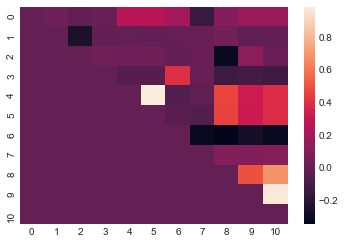

In [40]:
mask[np.tril_indices_from(mask)]=False
sns.heatmap(mask)

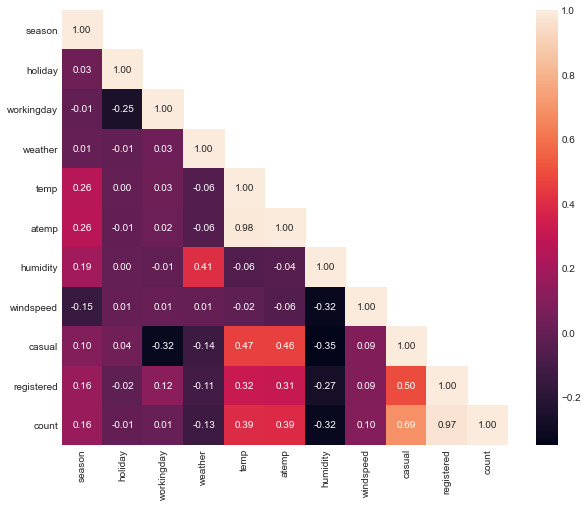

In [41]:
pl.figure(figsize=(10,8))
sns.heatmap(data=corr_mat,mask=mask,annot=True,
           fmt='.2f')
pl.show()

In [42]:
a=np.random.randint(1,10,(5,5))

<AxesSubplot:>

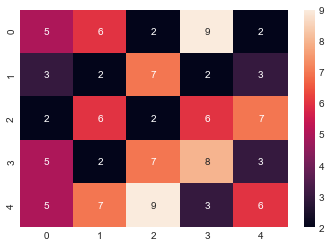

In [43]:
sns.heatmap(a,annot=True)

In [44]:
mask=np.array(a)
mask

array([[5, 6, 2, 9, 2],
       [3, 2, 7, 2, 3],
       [2, 6, 2, 6, 7],
       [5, 2, 7, 8, 3],
       [5, 7, 9, 3, 6]])

In [45]:
mask[np.tril_indices_from(mask)]=True
mask

array([[1, 6, 2, 9, 2],
       [1, 1, 7, 2, 3],
       [1, 1, 1, 6, 7],
       [1, 1, 1, 1, 3],
       [1, 1, 1, 1, 1]])

<AxesSubplot:>

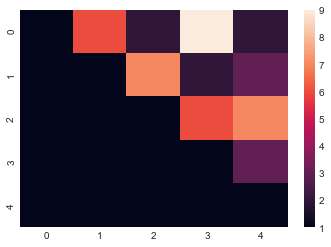

In [46]:
sns.heatmap(mask)

In [47]:
mask[np.tril_indices_from(mask)]=False
mask

array([[0, 6, 2, 9, 2],
       [0, 0, 7, 2, 3],
       [0, 0, 0, 6, 7],
       [0, 0, 0, 0, 3],
       [0, 0, 0, 0, 0]])

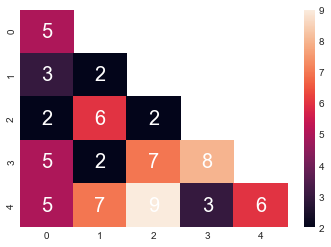

In [48]:
sns.heatmap(a,mask=mask,
           annot=True,
           annot_kws={'size':20,
                     'color':'white'})

pl.show()

In [49]:
season=pd.get_dummies(train['season'],prefix='season')
train=pd.concat([train,season],axis=1)

season=pd.get_dummies(test['season'],prefix='season')
test=pd.concat([test,season],axis=1)

In [50]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,season_1,season_2,season_3,season_4
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,0,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1,0,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1,0,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1,0,0,0


In [51]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,season_1,season_2,season_3,season_4
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,1,0,0,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,1,0,0,0
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,1,0,0,0
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,1,0,0,0
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,1,0,0,0


In [52]:
train['year']=train['datetime'].apply(lambda x: pd.to_datetime(x).year)
train['month']=train['datetime'].apply(lambda x: pd.to_datetime(x).month)

<AxesSubplot:xlabel='year', ylabel='count'>

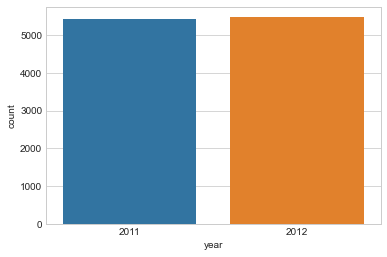

In [53]:
sns.countplot(train['year'])

<AxesSubplot:xlabel='month', ylabel='count'>

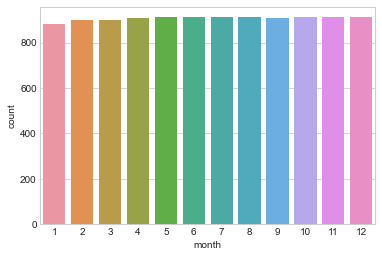

In [54]:
sns.countplot(train['month'])

In [55]:
season=pd.get_dummies(train['weather'],prefix='weather')
train=pd.concat([train,season],axis=1)
season=pd.get_dummies(test['weather'],prefix='weather')
test=pd.concat([test,season],axis=1)

In [56]:
train.drop(['season','weather'],axis=1,inplace=True)
test.drop(['season','weather'],axis=1,inplace=True)

In [57]:
train.head()

,datetime,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count,season_1,season_2,season_3,season_4,year,month,weather_1,weather_2,weather_3,weather_4
0,2011-01-01 00:00:00,0,0,9.84,14.395,81,0.0,3,13,16,1,0,0,0,2011,1,1,0,0,0
1,2011-01-01 01:00:00,0,0,9.02,13.635,80,0.0,8,32,40,1,0,0,0,2011,1,1,0,0,0
2,2011-01-01 02:00:00,0,0,9.02,13.635,80,0.0,5,27,32,1,0,0,0,2011,1,1,0,0,0
3,2011-01-01 03:00:00,0,0,9.84,14.395,75,0.0,3,10,13,1,0,0,0,2011,1,1,0,0,0
4,2011-01-01 04:00:00,0,0,9.84,14.395,75,0.0,0,1,1,1,0,0,0,2011,1,1,0,0,0


In [58]:
pd.DatetimeIndex(train['datetime'][:10])

DatetimeIndex(['2011-01-01 00:00:00', '2011-01-01 01:00:00',
               '2011-01-01 02:00:00', '2011-01-01 03:00:00',
               '2011-01-01 04:00:00', '2011-01-01 05:00:00',
               '2011-01-01 06:00:00', '2011-01-01 07:00:00',
               '2011-01-01 08:00:00', '2011-01-01 09:00:00'],
              dtype='datetime64[ns]', name='datetime', freq=None)

In [59]:
train['datetime'][:10]

0    2011-01-01 00:00:00
1    2011-01-01 01:00:00
2    2011-01-01 02:00:00
3    2011-01-01 03:00:00
4    2011-01-01 04:00:00
5    2011-01-01 05:00:00
6    2011-01-01 06:00:00
7    2011-01-01 07:00:00
8    2011-01-01 08:00:00
9    2011-01-01 09:00:00
Name: datetime, dtype: object

In [60]:
train['hour']=[t.hour for t in pd.DatetimeIndex(train['datetime'])]
train['day']=[t.dayofweek for t in pd.DatetimeIndex(train['datetime'])]
train['month']=[t.month for t in pd.DatetimeIndex(train['datetime'])]
train['year']=[t.year for t in pd.DatetimeIndex(train['datetime'])]
train['year']=train['year'].map({2011:0,2012:1})
train.head()

,datetime,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count,...,season_3,season_4,year,month,weather_1,weather_2,weather_3,weather_4,hour,day
0,2011-01-01 00:00:00,0,0,9.84,14.395,81,0.0,3,13,16,...,0,0,0,1,1,0,0,0,0,5
1,2011-01-01 01:00:00,0,0,9.02,13.635,80,0.0,8,32,40,...,0,0,0,1,1,0,0,0,1,5
2,2011-01-01 02:00:00,0,0,9.02,13.635,80,0.0,5,27,32,...,0,0,0,1,1,0,0,0,2,5
3,2011-01-01 03:00:00,0,0,9.84,14.395,75,0.0,3,10,13,...,0,0,0,1,1,0,0,0,3,5
4,2011-01-01 04:00:00,0,0,9.84,14.395,75,0.0,0,1,1,...,0,0,0,1,1,0,0,0,4,5


<AxesSubplot:xlabel='year', ylabel='count'>

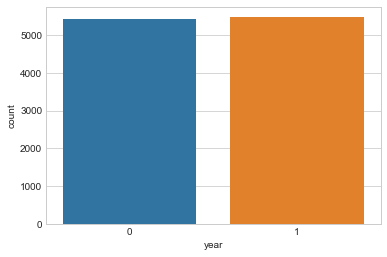

In [61]:
sns.countplot(train['year'])

In [62]:
test['hour']=[t.hour for t in pd.DatetimeIndex(test['datetime'])]
test['day']=[t.dayofweek for t in pd.DatetimeIndex(test['datetime'])]
test['month']=[t.month for t in pd.DatetimeIndex(test['datetime'])]
test['year']=[t.year for t in pd.DatetimeIndex(test['datetime'])]
test['year']=test['year'].map({2011:0,2012:1})
test.head()

,datetime,holiday,workingday,temp,atemp,humidity,windspeed,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4,hour,day,month,year
0,2011-01-20 00:00:00,0,1,10.66,11.365,56,26.0027,1,0,0,0,1,0,0,0,0,3,1,0
1,2011-01-20 01:00:00,0,1,10.66,13.635,56,0.0000,1,0,0,0,1,0,0,0,1,3,1,0
2,2011-01-20 02:00:00,0,1,10.66,13.635,56,0.0000,1,0,0,0,1,0,0,0,2,3,1,0
3,2011-01-20 03:00:00,0,1,10.66,12.880,56,11.0014,1,0,0,0,1,0,0,0,3,3,1,0
4,2011-01-20 04:00:00,0,1,10.66,12.880,56,11.0014,1,0,0,0,1,0,0,0,4,3,1,0


<AxesSubplot:xlabel='year', ylabel='count'>

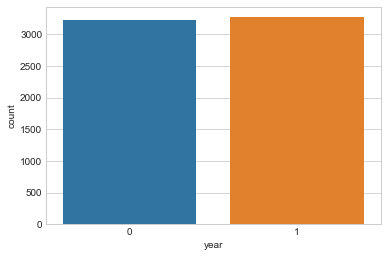

In [63]:
sns.countplot(test['year'])

In [64]:
train.drop('datetime',axis=1,inplace=True)
test.drop('datetime',axis=1,inplace=True)

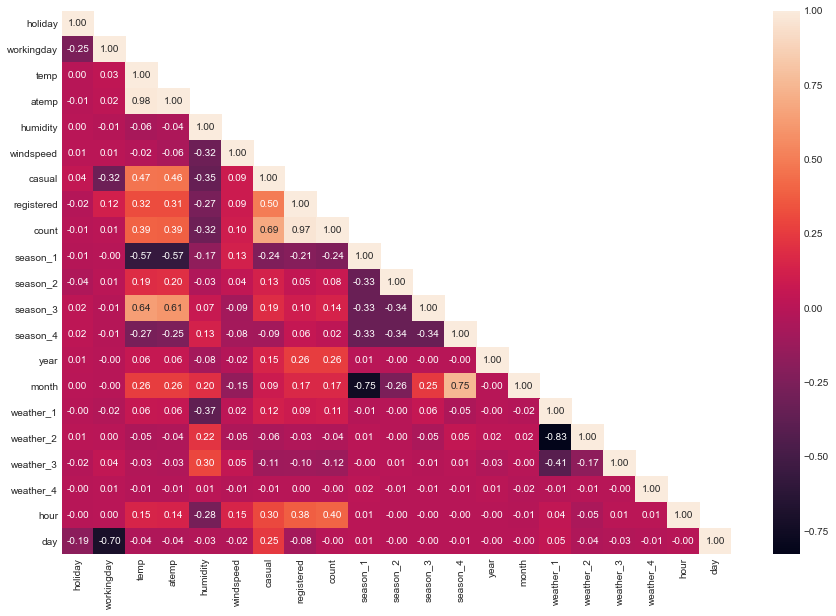

In [65]:
pl.figure(figsize=(15,10))
corr_mat=train.corr()
mask=np.array(corr_mat)
mask[np.tril_indices_from(mask)]=False
sns.heatmap(data=corr_mat,mask=mask,annot=True,fmt='.2f')
pl.show()

In [66]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [67]:
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [68]:
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error # for regression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score  # for classification

In [69]:
X_train,X_test,y_train,y_test=train_test_split(train.drop('count',axis=1),train['count'],test_size=0.25,random_state=42)

In [70]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((8164, 20), (2722, 20), (8164,), (2722,))

In [71]:
models=[RandomForestRegressor(),AdaBoostRegressor(),BaggingRegressor(),
       SVR(),KNeighborsRegressor()]
model_names=['RandomForestRegresser','AdaBoostRegressor','BaggingRegressor','SVR','KNeighborsRegressor']
rmsle=[]
train_scores=[]
test_scores=[]
for model in models:
    classifier=model
    classifier.fit(X_train,y_train)
    pred=classifier.predict(X_test)
    rmsle.append(np.sqrt(mean_squared_log_error(pred,y_test)))
    train_scores.append(classifier.score(X_train,y_train))
    test_scores.append(classifier.score(X_test,y_test))

In [72]:
d={'Algorithms':model_names,'RMSLE':rmsle}
scores={'Algorithms':model_names,'Train Score':train_scores,'Test Score':test_scores}
rmsle=pd.DataFrame(d)
rmsle

,Algorithms,RMSLE
0,RandomForestRegresser,0.016746
1,AdaBoostRegressor,0.826953
2,BaggingRegressor,0.018533
3,SVR,0.268856
4,KNeighborsRegressor,0.128254


In [73]:
scoes=pd.DataFrame(scores).set_index('Algorithms')
scoes

,Train Score,Test Score
Algorithms,,
RandomForestRegresser,0.999950,0.999637
AdaBoostRegressor,0.976842,0.976630
BaggingRegressor,0.999873,0.999540
SVR,0.963067,0.959087
KNeighborsRegressor,0.999580,0.999377


<AxesSubplot:xlabel='Algorithms'>

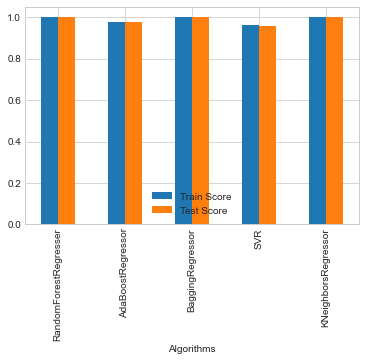

In [74]:
scoes.plot(kind='bar')

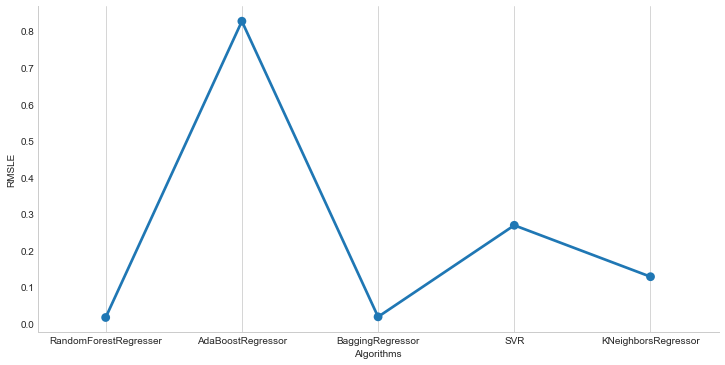

In [75]:
sns.factorplot(x='Algorithms',y='RMSLE',data=rmsle,kind='point',
              size=5,aspect=2)
pl.grid()

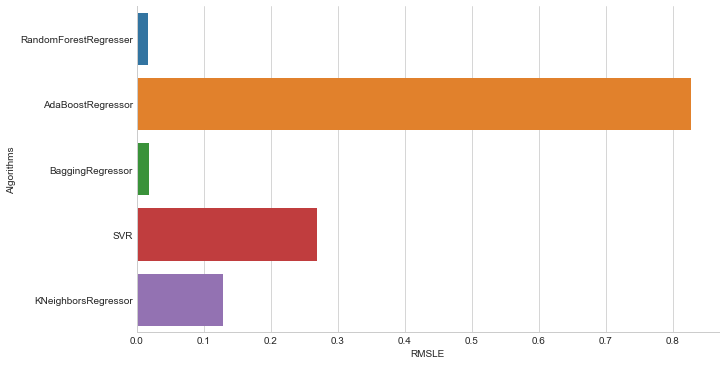

In [76]:
sns.factorplot(y='Algorithms',x='RMSLE',data=rmsle,kind='bar',
              size=5,aspect=2)

# After Dropping

In [77]:
train.drop(['casual','registered'],axis=1,inplace=True)
X_train,X_test,y_train,y_test=train_test_split(train.drop('count',axis=1),train['count'],test_size=0.25,random_state=42)
models=[RandomForestRegressor(),AdaBoostRegressor(),BaggingRegressor(),
       SVR(),KNeighborsRegressor()]
model_names=['RandomForestRegresser','AdaBoostRegressor','BaggingRegressor','SVR','KNeighborsRegressor']
rmsle=[]
train_scores=[]
test_scores=[]
for model in models:
    classifier=model
    classifier.fit(X_train,y_train)
    pred=classifier.predict(X_test)
#     rmsle.append(np.sqrt(mean_squared_log_error(pred,y_test)))
    train_scores.append(classifier.score(X_train,y_train))
    test_scores.append(classifier.score(X_test,y_test))
# d={'Algorithms':model_names,'RMSLE':rmsle}
after_scores={'Algorithms':model_names,'Train Score':train_scores,'Test Score':test_scores}
# rmsle=pd.DataFrame(d)
# rmsle
after_scores=pd.DataFrame(after_scores)
after_scores




,Algorithms,Train Score,Test Score
0,RandomForestRegresser,0.992597,0.954403
1,AdaBoostRegressor,0.678491,0.673344
2,BaggingRegressor,0.988612,0.944887
3,SVR,0.245674,0.243356
4,KNeighborsRegressor,0.717674,0.578167


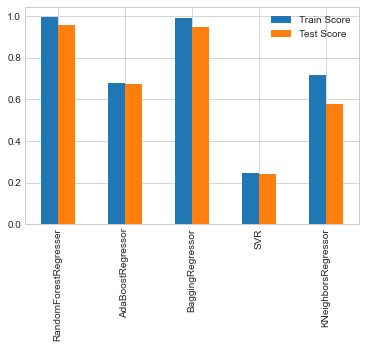

In [78]:
after_scores.plot.bar()
pl.xticks(range(5),after_scores['Algorithms'])
pl.show()